In [1]:
# 1) 필수 라이브러리 import

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

C:\Users\takea\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import pandas as pd

# iris.data 파일을 불러옵니다.
data = pd.read_csv(r'C:\Users\takea\Desktop\DL\datasets\week1\iris\iris.data', header=None)

# car.names 파일에서 컬럼 이름을 가져옵니다.
column_names = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
    'class'
    ]

# 데이터프레임에 컬럼 이름을 설정합니다.
data.columns = column_names

# 데이터셋 확인
print(data.head())
data

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.DataFrame(data, columns=columns)

# 'class' 열 삭제
data.drop(columns=['class'], inplace=True)

# 수정된 데이터프레임을 출력 또는 저장할 수 있음
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#  주어진 데이터 프레임 (data)에서 각 열(속성)별로 결측값 (NaN 또는 None)의 개수를 계산하는 코드
# Is Not Available
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [6]:
# 데이터프레임 또는 데이터셋에서 결측값 (NaN 또는 None)을 삭제하는 코드
data = data.dropna()

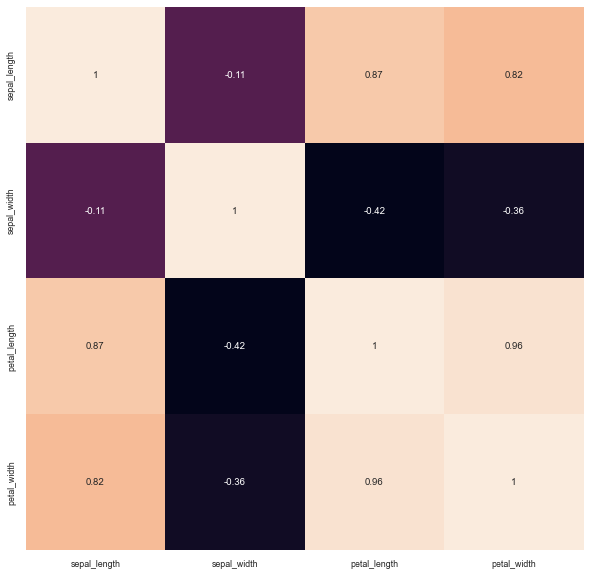

In [7]:
### 상관 관계 행렬 ###
# 데이터셋 내의 다양한 변수(또는 특성)들 간의 상호 관계를 나타내는 행렬
data_corr=data.corr()

### 히트맵 ###
# Matplotlib 라이브러리를 사용하여 히트맵의 그림 크기를 지정
plt.figure(figsize=(10,10))
# Seaborn 라이브러리의 스타일을 설정
sns.set(font_scale=0.8)
# Seaborn 라이브러리를 사용하여 히트맵을 생성
sns.heatmap(data_corr, annot=True, cbar=False)
#  그래프를 화면에 표시
plt.show()

In [8]:
#Set x and y values
# 'petal_width'은 목표변수로, 예측하려는 대상을 나타내는 변수를 의미
y=data.petal_width.values
x_df=data.drop('petal_width',axis=1)
#normalization
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

In [9]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

# DecisionTree

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

0.999584199103949


In [11]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.30822070014844877


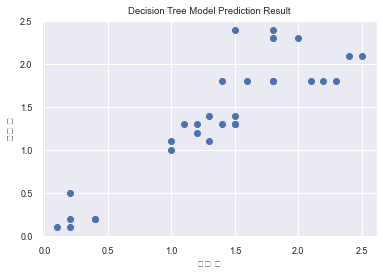

In [12]:
plt.scatter(y_test, pred_dt)
plt.xlabel("실제 값")
plt.ylabel("예측 값")
plt.title("Decision Tree Model Prediction Result")
plt.show()

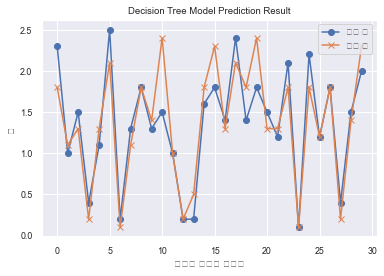

In [13]:
plt.plot(y_test, label="실제 값", marker="o")
plt.plot(pred_dt, label="예측 값", marker="x")
plt.xlabel("데이터 포인트 인덱스")
plt.ylabel("값")
plt.title("Decision Tree Model Prediction Result")
plt.legend()
plt.show()

# RandomForest

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

0.9930361701156967


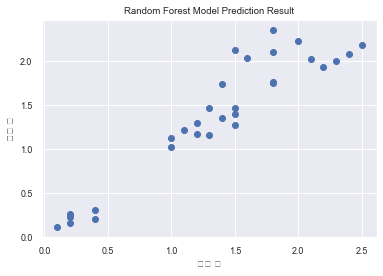

In [15]:
plt.scatter(y_test, pred_rf)
plt.xlabel("실제 값")
plt.ylabel("예측 값")
plt.title("Random Forest Model Prediction Result")
plt.show()

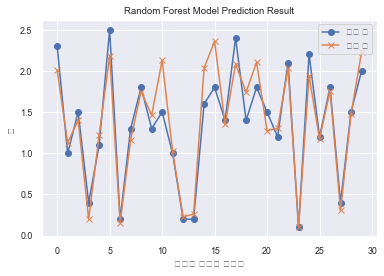

In [16]:
plt.plot(y_test, label="실제 값", marker="o")
plt.plot(pred_rf, label="예측 값", marker="x")
plt.xlabel("데이터 포인트 인덱스")
plt.ylabel("값")
plt.title("Random Forest Model Prediction Result")
plt.legend()
plt.show()

In [17]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.24011216186977696


# LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.9402315527525301


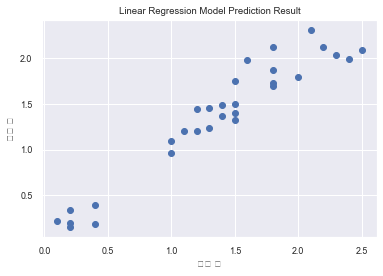

In [19]:
plt.scatter(y_test, pred_lr)
plt.xlabel("실제 값")
plt.ylabel("예측 값")
plt.title("Linear Regression Model Prediction Result")
plt.show()

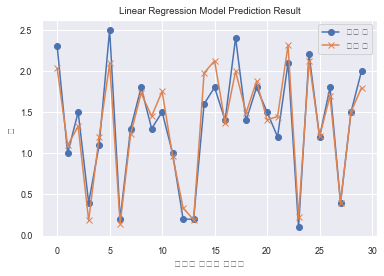

In [20]:
plt.plot(y_test, label="실제 값", marker="o")
plt.plot(pred_lr, label="예측 값", marker="x")
plt.xlabel("데이터 포인트 인덱스")
plt.ylabel("값")
plt.title("Linear Regression Model Prediction Result")
plt.legend()
plt.show()

In [21]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.18848521494159057


# SupportVectorMachine

In [22]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.9547726049226818


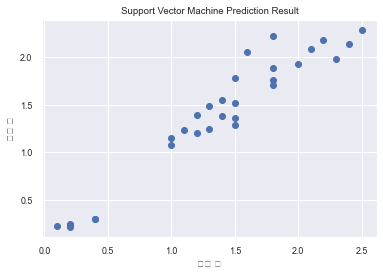

In [23]:
plt.scatter(y_test, pred_svm)
plt.xlabel("실제 값")
plt.ylabel("예측 값")
plt.title("Support Vector Machine Prediction Result")
plt.show()

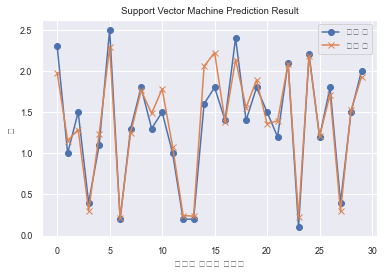

In [24]:
plt.plot(y_test, label="실제 값", marker="o")
plt.plot(pred_svm, label="예측 값", marker="x")
plt.xlabel("데이터 포인트 인덱스")
plt.ylabel("값")
plt.title("Support Vector Machine Prediction Result")
plt.legend()
plt.show()

In [25]:
se = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.18848521494159057
